## RECENCY, FREQUENCY, AND MONETARY

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams

%matplotlib inline
sns.set(style = "darkgrid")
import math
import datetime as dt
import calendar
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Customer_Approved.csv")

In [3]:
df.transaction_month.unique()

array(['February', 'October', 'April', 'May', 'January', 'December',
       'November', 'September', 'August', 'June', 'March', 'July'],
      dtype=object)

In [4]:
df.columns

Index(['customer_id', 'transaction_date', 'online_order', 'order_status',
       'brand', 'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'profit', 'transaction_month', 'transaction_day',
       'day_of_the_week', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age',
       'address', 'postcode', 'state', 'property_valuation', 'age_bin',
       'tenure_bin'],
      dtype='object')

In [5]:
# Subset sucesssful transactions from the entire dataset
data = df[df["order_status"] == "Approved"]
data.head()

,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,...,wealth_segment,owns_car,tenure,age,address,postcode,state,property_valuation,age_bin,tenure_bin
0,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,...,Mass Customer,Yes,10,68,984 Hoepker Court,3064,VIC,6,60s,9-13
1,2950,2017-10-16,0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,...,Mass Customer,Yes,10,68,984 Hoepker Court,3064,VIC,6,60s,9-13
2,2950,2017-04-26,0,Approved,Solex,Standard,medium,medium,478.16,298.72,...,Mass Customer,Yes,10,68,984 Hoepker Court,3064,VIC,6,60s,9-13
3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,...,Mass Customer,Yes,10,44,4 Shopko Circle,2196,NSW,5,40s,9-13
4,3120,2017-10-05,0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,...,Mass Customer,Yes,10,44,4 Shopko Circle,2196,NSW,5,40s,9-13


In [6]:
data.columns

Index(['customer_id', 'transaction_date', 'online_order', 'order_status',
       'brand', 'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'profit', 'transaction_month', 'transaction_day',
       'day_of_the_week', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age',
       'address', 'postcode', 'state', 'property_valuation', 'age_bin',
       'tenure_bin'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19152 entries, 0 to 19151
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          19152 non-null  int64  
 1   transaction_date                     19152 non-null  object 
 2   online_order                         19152 non-null  int64  
 3   order_status                         19152 non-null  object 
 4   brand                                19152 non-null  object 
 5   product_line                         19152 non-null  object 
 6   product_class                        19152 non-null  object 
 7   product_size                         19152 non-null  object 
 8   list_price                           19152 non-null  float64
 9   standard_cost                        19152 non-null  float64
 10  profit                               19152 non-null  float64
 11  transaction_month           

In [8]:
data["customer_id"] = data.customer_id.astype('str')

In [9]:
# We will be making use of 3 columns; customer id, transaction date, list price
rfm = data[["customer_id", "transaction_date", "list_price"]]

In [10]:
rfm

,customer_id,transaction_date,list_price
0,2950,2017-02-25,71.49
1,2950,2017-10-16,1403.50
2,2950,2017-04-26,478.16
3,3120,2017-05-21,2091.47
4,3120,2017-10-05,1129.13
...,...,...,...
19147,3168,2017-02-21,441.49
19148,3168,2017-04-11,2083.94
19149,3168,2017-06-03,2091.47
19150,3168,2017-09-30,2091.47


In [11]:
rfm.transaction_date.min(), rfm.transaction_date.max()

('2017-01-01', '2017-12-30')

In [12]:
present = dt.datetime(2018, 1, 1)

In [13]:
rfm["transaction_date"] = pd.to_datetime(rfm["transaction_date"])

In [14]:
rfm = rfm.groupby("customer_id").agg({"transaction_date": lambda date: ((present - date.max()).days),
                                       "customer_id": lambda num: len(num),
                                       "list_price": lambda price : price.sum()})

In [15]:
rfm.columns = ["recency", "frequency", "monetary"]

In [16]:
rfm.reset_index(inplace = True)

In [17]:
# Computing the quartile of RFM values
# Customers with the highest frequency, highest monetary, and lowest recency considers as Top customers
rfm["r_Q"] = pd.qcut(rfm["recency"], 4, [4, 3, 2, 1])
rfm["f_Q"] = pd.qcut(rfm["frequency"], 4, [1, 2, 3, 4])
rfm["m_Q"] = pd.qcut(rfm["monetary"], 4, [1, 2, 3, 4])

In [18]:
rfm

,customer_id,recency,frequency,monetary,r_Q,f_Q,m_Q
0,1,9,11,9084.45,4,4,4
1,100,13,2,2748.20,4,1,1
2,1000,2,9,10183.70,4,4,4
3,1001,44,7,6233.51,3,3,3
4,1002,157,4,5038.32,1,1,2
...,...,...,...,...,...,...,...
3406,994,44,5,3901.01,3,2,1
3407,995,13,7,9379.04,4,3,4
3408,997,61,7,6397.73,2,3,3
3409,998,323,2,1565.55,1,1,1


In [19]:
rfm[(rfm["m_Q"] == 1) & (rfm["f_Q"] == 4)]

,customer_id,recency,frequency,monetary,r_Q,f_Q,m_Q


In [20]:
rfm.dtypes

customer_id      object
recency           int64
frequency         int64
monetary        float64
r_Q            category
f_Q            category
m_Q            category
dtype: object

In [21]:
rfm["customer_id"] = rfm["customer_id"].astype("str")
rfm["rfm_class"] = rfm.r_Q.astype("str") + rfm.f_Q.astype("str") + rfm.m_Q.astype("str")
rfm["rfm_class"] = rfm.rfm_class.astype("int")
rfm["total_score"] = rfm["r_Q"].astype("int") + rfm["f_Q"].astype("int") + rfm["m_Q"].astype("int")
rfm[rfm["total_score"] == 12].sort_values("monetary", ascending = False).head()

,customer_id,recency,frequency,monetary,r_Q,f_Q,m_Q,rfm_class,total_score
1288,2183,10,14,19071.32,4,4,4,444,12
154,1140,8,13,16199.24,4,4,4,444,12
3121,729,3,10,15826.00,4,4,4,444,12
347,1317,12,9,15370.81,4,4,4,444,12
2413,322,3,12,14782.23,4,4,4,444,12


In [22]:
rfm_quartiles = (rfm['rfm_class'].max(), rfm['rfm_class'].quantile(q=0.75),
                 rfm['rfm_class'].median(), rfm['rfm_class'].quantile(q=0.25), 
                 rfm['rfm_class'].min())
rfm_quartiles

(444, 411.0, 311.0, 211.0, 111)

In [23]:
def RFMClass(x, p, d):
    if x >= d[0]:
        return 'platinum'
    elif x >= d[1]:
        return 'gold'
    elif x >= d[2]: 
        return 'silver'
    elif x >= d[3]:
        return 'bronze'
    else: 
        return 'basic'

rfm['segment'] = rfm['rfm_class'].apply(RFMClass, args=('rfm_class', rfm_quartiles))
rfm.head()

,customer_id,recency,frequency,monetary,r_Q,f_Q,m_Q,rfm_class,total_score,segment
0,1,9,11,9084.45,4,4,4,444,12,platinum
1,100,13,2,2748.20,4,1,1,411,6,gold
2,1000,2,9,10183.70,4,4,4,444,12,platinum
3,1001,44,7,6233.51,3,3,3,333,9,silver
4,1002,157,4,5038.32,1,1,2,112,4,basic


In [24]:
rfm.groupby("segment").mean().sort_values("monetary", ascending = False)

,recency,frequency,monetary,rfm_class,total_score
segment,,,,,
platinum,9.770000,9.385000,10881.665250,444.000000,12.000000
silver,32.997579,6.187651,6846.916271,328.762712,8.303874
bronze,66.118800,5.652826,6187.305859,226.387543,6.910035
gold,11.130882,5.375000,5797.215426,424.966176,8.650000
basic,148.474940,4.305489,4828.946647,119.538186,4.761337


In [25]:
count = rfm.segment.value_counts()
count

bronze      867
basic       838
silver      826
gold        680
platinum    200
Name: segment, dtype: int64

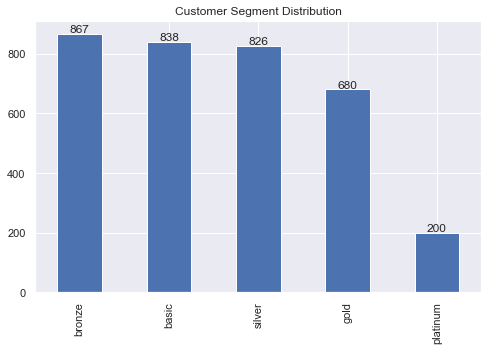

In [26]:
plt.figure(figsize = [8, 5])
count.plot(kind = 'bar')
for loc, label in enumerate(count.index):
    counts = count.loc[label]
    pct_str = "{:.0f}".format(counts)
    plt.text(loc, counts + 5, pct_str, ha="center")
plt.title('Customer Segment Distribution')
plt.show()

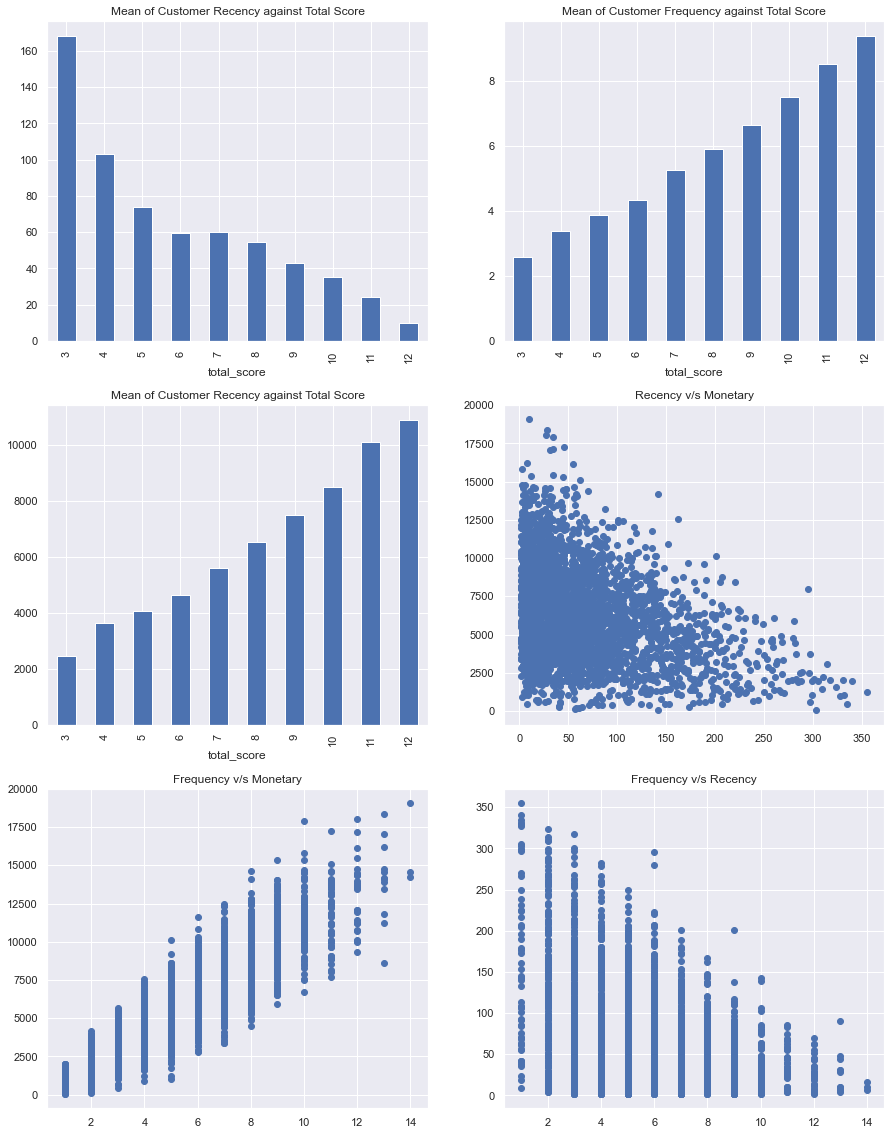

In [27]:
plt.figure(figsize = [15, 20])
plt.subplot(3, 2, 1)
rfm.groupby('total_score')['recency'].mean().plot(kind='bar')
plt.title('Mean of Customer Recency against Total Score')

plt.subplot(3, 2, 2)
rfm.groupby('total_score')['frequency'].mean().plot(kind='bar')
plt.title('Mean of Customer Frequency against Total Score')

plt.subplot(3, 2, 3)
rfm.groupby('total_score')['monetary'].mean().plot(kind='bar')
plt.title('Mean of Customer Recency against Total Score')

plt.subplot(3, 2, 4)
plt.scatter(rfm['recency'], rfm['monetary'])
plt.title('Recency v/s Monetary')

plt.subplot(3, 2, 5)
plt.scatter(rfm['frequency'], rfm['monetary'])
plt.title('Frequency v/s Monetary')

plt.subplot(3, 2, 6)
plt.scatter(rfm['frequency'], rfm['recency'])
plt.title('Frequency v/s Recency')

plt.show()

In [28]:
# Primary key for joining the datasets
all_columns = pd.Series(list(data) + list(rfm))
all_columns[all_columns.duplicated()].unique()

array(['customer_id'], dtype=object)

In [29]:
# Merge the dataframes using the merge function
dfRFM = pd.merge(data, rfm, on = "customer_id", how = "inner")

In [30]:
dfRFM

,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,...,tenure_bin,recency,frequency,monetary,r_Q,f_Q,m_Q,rfm_class,total_score,segment
0,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,...,9-13,77,3,1953.15,2,1,1,211,4,bronze
1,2950,2017-10-16,0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,...,9-13,77,3,1953.15,2,1,1,211,4,bronze
2,2950,2017-04-26,0,Approved,Solex,Standard,medium,medium,478.16,298.72,...,9-13,77,3,1953.15,2,1,1,211,4,bronze
3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,...,9-13,22,7,7351.70,3,3,3,333,9,silver
4,3120,2017-10-05,0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,...,9-13,22,7,7351.70,3,3,3,333,9,silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19147,3168,2017-02-21,1,Approved,Solex,Standard,medium,medium,441.49,84.99,...,17-22,93,4,6708.37,1,1,3,113,5,basic
19148,3168,2017-04-11,0,Approved,Solex,Touring,medium,large,2083.94,675.03,...,17-22,93,4,6708.37,1,1,3,113,5,basic
19149,3168,2017-06-03,0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,...,17-22,93,4,6708.37,1,1,3,113,5,basic
19150,3168,2017-09-30,0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,...,17-22,93,4,6708.37,1,1,3,113,5,basic


In [31]:
# Save dataset to csv file
path = "C:/Users/USER/Documents/Udacity/Sprocket/Decision Tree/Customer_RFM.csv"
dfRFM.to_csv(path, index = False)